# Project : Classification - Titanic 
**Veronica Gabriella - PYTN053ONL007**

# Titanic
![Titanic](https://www.jigsaw-online.com/blog/wp-content/uploads/2012/04/Titanic.jpg)
**Data source : https://www.kaggle.com/c/titanic**

Tenggelamnya kapal Titanic adalah salah satu cerita bersejarah kapal tenggelam yang paling terkenal. Pada tanggal 15 April 1912, selama pelayaran perdananya, RMS Titanic yang dianggap "tidak dapat tenggelam",tenggelam setelah bertabrakan dengan gunung es. Sayangnya, tidak ada cukup sekoci untuk semua orang di dalamnya, mengakibatkan kematian 1502 dari 2224 penumpang dan awak. Meskipun ada beberapa unsur keberuntungan yang terlibat dalam bertahan hidup, tampaknya beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain. Pada kasus ini, kita akan melakukan **teknik supervised Classification** dataset Titanic untuk memprediksi penumpang yang selamat pada kapal Titanic **(Orang yang seperti apa yang lebih mungkin selamat?)**. Berdasarkan beberapa kriteria **sosial, jenis kelamin dan tiket yang dibeli.** **Apakah perempuan akan lebih banyak yang selamat atau laki-laki? atau sebaliknya?**

**Data yang dipakai adalah train.csv (891, 12)**

**Data Dictionary:**
- survival : Survival
- pclass : Ticket Class
- sex : Sex
- Age : Age in years
- sibsp : of siblings/spouses aboard the Titanic
- parch : of parents/children aboard the Titanic
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of Embarkation

**Variable Notes:**
- pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
    
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.


## Import Libraries 
Import libraries yang digunakan untuk project ini.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Data Loading & Exploratory Data Analysis (EDA) 
Tahapan ini kita akan melakukan load dataset terlebih dahulu, dataset yang digunakan adalah train.csv, kemudian dilanjutkan dengan proses EDA.

In [2]:
# train dataset
df_train = pd.read_csv("titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print("shape of dataset:",df_train.shape)

shape of dataset: (891, 12)


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Mencari nilai korelasi antar features.
df_train.corr().style.background_gradient().set_precision(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


### Exploratory Data Analysis (EDA)

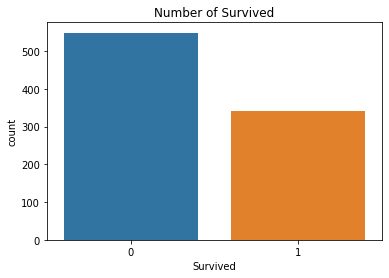

In [8]:
# jumlah total yang selamat dan tidak selamat
sns.countplot(x="Survived", data=df_train)
plt.title("Number of Survived")
plt.show()

In [9]:
# Get a count of the number of survivors
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Berikut adalah nilai target "Survived". Berdasarkan plot banyak penumpang yang tidak selamat dibandingkan yang selamat.
- Nilai 0 merepresentasikan tidak selamat
- Nilai 1 merepresentasikan selamat

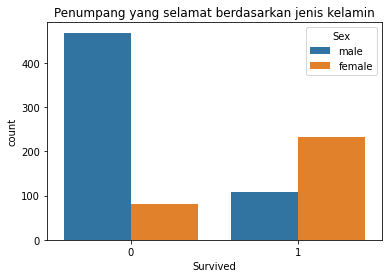

In [10]:
# Penumpang yang selamat berdasarkan gender
sns.countplot(x="Survived",hue="Sex", data=df_train)
plt.title("Penumpang yang selamat berdasarkan jenis kelamin")
plt.show()

In [11]:
#Ratio dari angka yang bertahan hidup berdasarkan gender
df_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


- Berdasarkan plot tersebut penumpang wanita lebih banyak yang selamat dibandingkan pria **18.89%)**. Sebesar **74%** Penumpang wanita yang selamat atas kejadian tenggelamnya kapal Titanic.

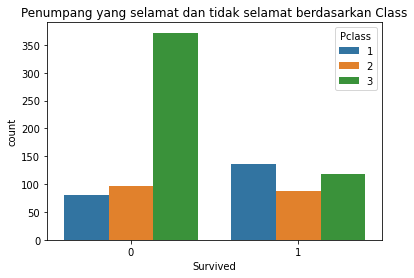

In [12]:
# Penumpang yang selamat dan tidak selamat berdasarkan Class
sns.countplot(x="Survived", hue="Pclass", data=df_train)
plt.title("Penumpang yang selamat dan tidak selamat berdasarkan Class")
plt.show()

In [13]:
# Melihat angka ratio bertahan hidup berdasarkan by sex and class
df_train.pivot_table("Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- Berdasarkan plot di atas diketahui penumpang yang tidak selamat pada kelas 3(lower). Banyak penumpang kelas 1 yang selamat

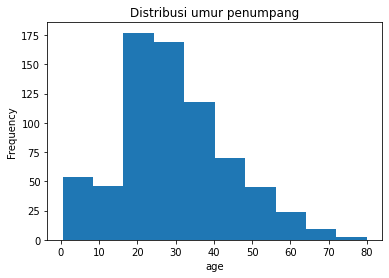

In [14]:
# Persebaran umur penumpang
df_train["Age"].plot.hist()
plt.xlabel("age")
plt.title("Distribusi umur penumpang")
plt.show()

- berdasarkan histogram di atas diketahui kelompok umur yang paling banyak melakukan perjalanan dengan kapal Titanic adalah umur 20-40. Sedangkan kelompok umur penumpang yang paling sedikit adalah 70-80.

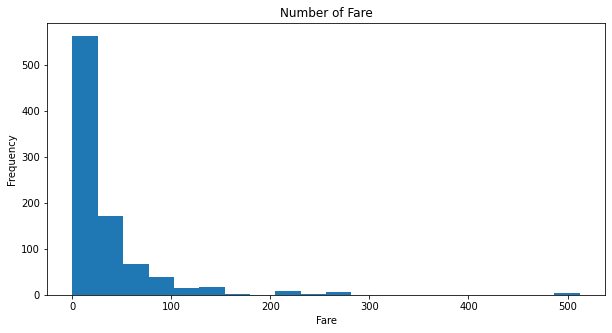

In [15]:
# Persebaran frekuensi berdasarkan Fare
df_train["Fare"].plot.hist(bins=20, figsize=(10,5))
plt.title("Number of Fare")
plt.xlabel("Fare")
plt.show()

- kebanyakan penumpang membeli tiket dengan harga 100. sedangkan yang paling sedikit penjualannya adalah tiket untuk harga dengan jangkauan 200-500.

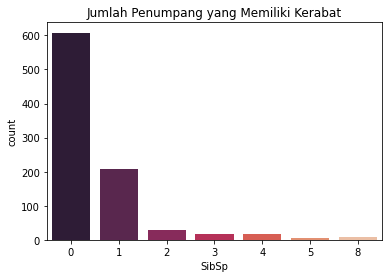

In [16]:
# Jumlah penumpang yang memiliki kerabat
sns.countplot(x="SibSp", data=df_train, palette="rocket")
plt.title("Jumlah Penumpang yang Memiliki Kerabat")
plt.show()

- Berdasarkan plot tersebut kebanyakan penumpang kapal Titanic tidak memiliki kerabat.

**Sehabis melihat visualisasi data, dapat disimpulkan hal yang paling berpengaruh terhadap keselamatan penumpang adalah gender,umur dan kelas tiket.**

# Data Wrangling
cleaning the data, removing the null values
Tahapan selanjutnya adalah melakukan cleaning data, diketahui bahwa data terdapat yang bernilai null.

In [17]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- age, embarked dan cabin memiliki missing values

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_train.drop('Cabin', axis=1, inplace=True)

- kolom yang tidak terlalu berpengaruh pada target adalah kolom **Cabin**. Maka, kolom Cabin akan di drop. **Kolom Cabin** hanya memberikan informasi mengenai cabin yang ada pada kapal dan kurang berpengaruh terhadap keselamatan penumpang

In [20]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [21]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
#repalce the missing values 'Embarked' column with the highest occuring frequency.
df_train['Embarked'] = df_train['Embarked'].fillna('S') 

- Untuk mengisi 2 missing values kita menggunakan kategori yang memiliki frekuensi yang paling banyak pada **kolom Embarked yaitu S.**

In [23]:
df_train.dropna(inplace=True)

In [24]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
print("shape of dataset after handled missing value:",df_train.shape)

shape of dataset after handled missing value: (714, 11)


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


***sedangkan untuk age, age sangat berpengaruh terhadap target survived, apabila kita mengisi missing value dengan nilai rata-rata maka akan mempengaruhi hasil prediksi atau kriteria. Maka, lebih baik untuk menghapus semua yang bernilai null.***

# Data Preprocessing
tahapan ini akan melakukan normalisasi, transformasi data yang digunakan seperti Encoding, train-dev-test. 

## Preprocessing -  Encoding
terdapat value yang memiliki tipe data object seperti age, embarked sehingga perlu dikonversi menjadi numerical, maka dilakukan encoding

In [27]:
# look at the data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [28]:
#Print  the unique values in the columns
print(df_train["Sex"].unique())
print(df_train["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [29]:
labelencoder = LabelEncoder()

#Encode the sex column
df_train.iloc[:,4]= labelencoder.fit_transform(df_train.iloc[:,4].values)

#Encode the embarked column
df_train.iloc[:,10]= labelencoder.fit_transform(df_train.iloc[:,10].values)

In [30]:
#Print  the unique values in the columns
print(df_train["Sex"].unique())
print(df_train["Embarked"].unique())

[1 0]
[2 0 1]


In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


***Kita akan drop kolom yang tidak diperlukan seperti Name, PassengerId, dan Ticket dikarenakan ketiga kolom tersebut memiliki nilai yang unique***

In [32]:
df_train.drop(["Name", "PassengerId","Ticket"],axis=1, inplace=True)

In [33]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:
df_train["Age"] = df_train["Age"].astype(int)

In [35]:
print(df_train.dtypes)

Survived      int64
Pclass        int64
Sex           int32
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object


## Preprocessing - Split Train Data

In [36]:
X=df_train.drop("Survived", axis=1)
y=df_train["Survived"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=4)

Kita akan mengambil **33%** dataset sebagai **data test** dan menggunakan generator random_state sebesar **4**. Target label yang digunakan adalah **Survived**

## Preprocessing - Scalling the features

In [38]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Kita perlu melakukan **scaling data** terlebih dahulu untuk menyamakan rentang nilai (scale) yang sama. Sehingga tidak ada lagi satu variable data yang mendominasi variable data lainnya.

In [39]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (478, 7)
Test size: (236, 7)


*Berikut shape/ dimensi dataset hasil scaling data.*

# Define the Model & Training the Model
pada pelatihan ini saya mencoba beberapa model algoritma seperti **Logistic Regression, KNeighbors Classifier, SVC, Gaussian Naive Bayes, Decision Tree Classifier, dan Random Forest Classifier.**

1. **Decision Tree**: Alasan penggunaan algoritma ini adalah karena metode klasifikasi dan prediksi yang sangat kuat dan terkenal. Metode pohon keputusan mengubah fakta yang sangat besar menjadi pohon keputusan yang merepresentasikan aturan. Aturan dapat dengan mudah dipahami dengan bahasa alami.

2. **Naive Bayes** : Alasan pemilihan algoritma karena Algoritma ini memanfaatkan teori probabilitas yaitu memprediksi probabilitas di masa depan berdasrkan pengalaman di masa sebelumnya. 

3. **K-Nearest Neighbor** : Alasan pemilihan algoritma ini karena KNN memiliki beberapa kelebihan yaitu bahwa dia tangguh terhadap training data yang noisy dan efektif apabila training data-nya besar.

4. **SVM** : Alasan pemilihan algoritma ini karena Kemampuan generalisasi SVM untuk mengklasifikasikan suatu pattern, yang tidak termasuk data yang dipakai dalam fase pembelajaran metode. 

**Metode Evaluasi** yang digunakan menggunakan nilai ***accuracy*** dari confusion matrix sebagai indikator tingkat akurasi performansi dari algoritma klasifikasi. ***Accuracy*** sering digunakan dalam konteks metode klasifikasi. ***Accuracy*** mengacu pada pengukuran tingkat keakuratan atau prediksi dari suatu model atau metode klasifikasi.

**Hyperparameter yang digunakan untuk**
- Pada KNeighbors kita mencoba untuk mengelompokkan menjadi 5 kelompok, apakah dengan mengelompokkan menjadi 5 dapat menghasilkan model yang baik, untuk menghitung jarak menggunakan minkwoski. Minkwoski adalah generalisasi jarak euklides dan jarak manhattan dan p =2. Kita akan mencoba terlebih dahulu menggunakan metric Minkwoski. Karena metric ini dapat dikatakan bisa memberikan model yang baik selain euclidean.
- Decision Tree Classifier menggunakan entropy sebagai menghitung informasi gain.
- Random Forest Classifier, menggunakan maximum mengambil pohon sebesar 10, menghitung gain dengan menggunakan entropy.


In [40]:
# Perhitungan model 
models = [
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2),
    SVC(kernel='linear', random_state=0),
    SVC(kernel='rbf', random_state=0),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy', random_state=0),
    RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state=0)
]
for model in models:
    print("Training {}".format(model.__class__.__name__))
    model.fit(X_train, y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    print("--Training Performance--")
    print(classification_report(y_train, train_prediction))
    print()
    print("--Test Performances --")
    print(classification_report(y_test, test_prediction))
    print("======================DONE======================")
    print("")

Training LogisticRegression
--Training Performance--
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       289
           1       0.79      0.72      0.75       189

    accuracy                           0.81       478
   macro avg       0.81      0.80      0.80       478
weighted avg       0.81      0.81      0.81       478


--Test Performances --
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       135
           1       0.79      0.68      0.73       101

    accuracy                           0.79       236
   macro avg       0.79      0.77      0.78       236
weighted avg       0.79      0.79      0.79       236

======================DONE======================

Training KNeighborsClassifier
--Training Performance--
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       289
           1       0.85      0.79      0.82       189



In [41]:
# Create a function with many machine learning models

def models(X_train, y_train):
    #Use Logistic Regression
    logReg = LogisticRegression(random_state=0)
    logReg.fit(X_train, y_train)
    
    #Use KNeighbors
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #Use SVC(linear kernel)
    svc_l = SVC(kernel='linear', random_state=0)
    svc_l.fit(X_train, y_train)
    
    #Use SVC(RBF kernel)
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #Use GaussianNB
    gaussNB = GaussianNB()
    gaussNB.fit(X_train, y_train)
    
    #Use Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #Use the RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state=0)
    forest.fit(X_train, y_train)
    
    #Print the training accuracy for each model
    print('0. Logistic Regression:', logReg.score(X_train, y_train))
    print('1. K Neighbors Training:', knn.score(X_train, y_train))
    print('2. SVC Linear Training:', svc_l.score(X_train, y_train))
    print('3. SVC RBF Training:', svc_rbf.score(X_train, y_train))
    print('4. Gaussian NB Training:', gaussNB.score(X_train, y_train))
    print('5. Decision Tree Training:', tree.score(X_train, y_train))
    print('6. Random Forest Training:', forest.score(X_train, y_train))
    
    return logReg, knn, svc_l,svc_rbf,gaussNB,tree,forest

In [42]:
# Get and train all of the models
model = models(X_train, y_train)

0. Logistic Regression: 0.8138075313807531
1. K Neighbors Training: 0.8598326359832636
2. SVC Linear Training: 0.7866108786610879
3. SVC RBF Training: 0.8410041841004184
4. Gaussian NB Training: 0.803347280334728
5. Decision Tree Training: 0.9937238493723849
6. Random Forest Training: 0.9748953974895398


[[117  18]
 [ 32  69]]
Model[0] Testing Accuracy="0.788135593220339"


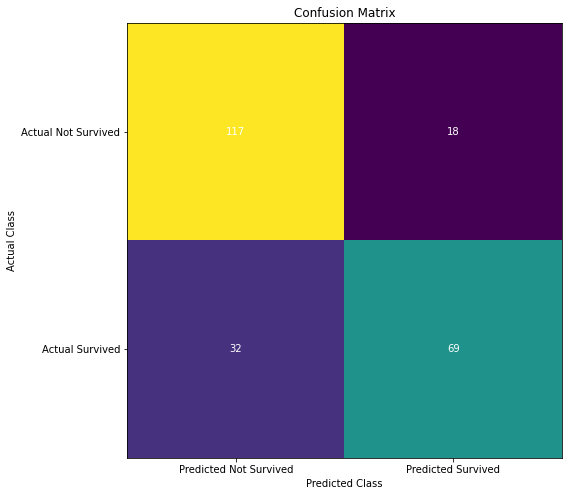

[[118  17]
 [ 31  70]]
Model[1] Testing Accuracy="0.7966101694915254"


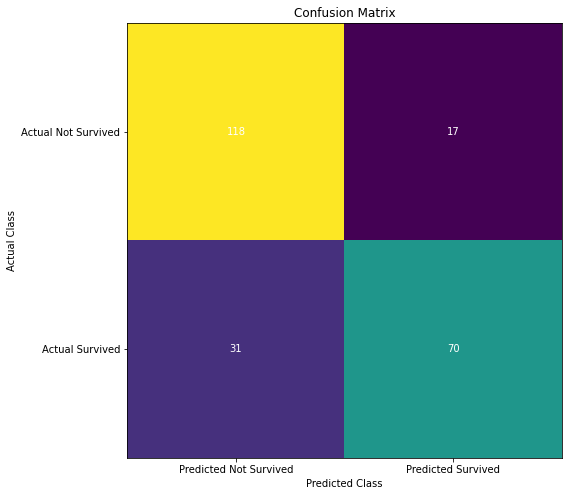

[[116  19]
 [ 36  65]]
Model[2] Testing Accuracy="0.7669491525423728"


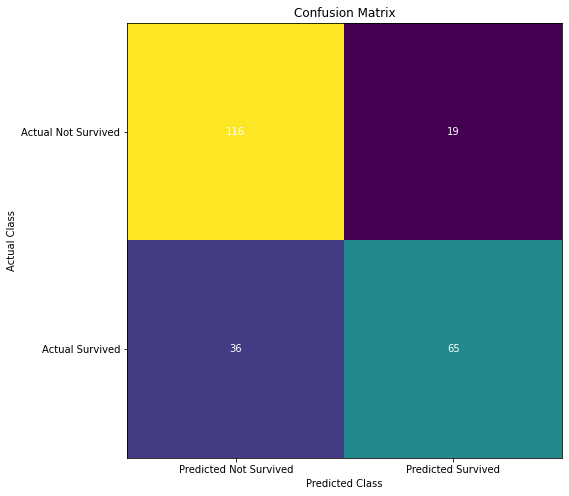

[[129   6]
 [ 41  60]]
Model[3] Testing Accuracy="0.8008474576271186"


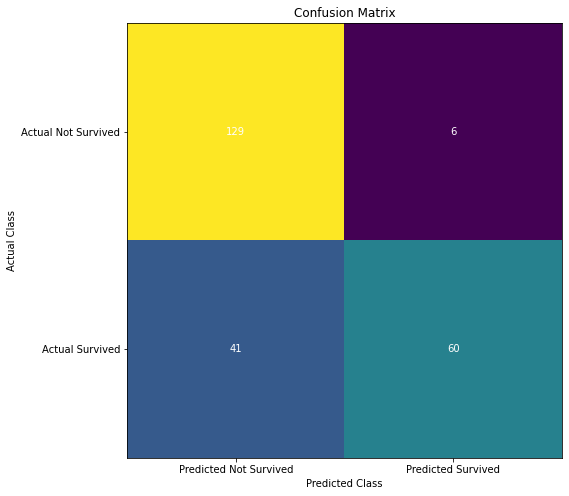

[[115  20]
 [ 33  68]]
Model[4] Testing Accuracy="0.7754237288135594"


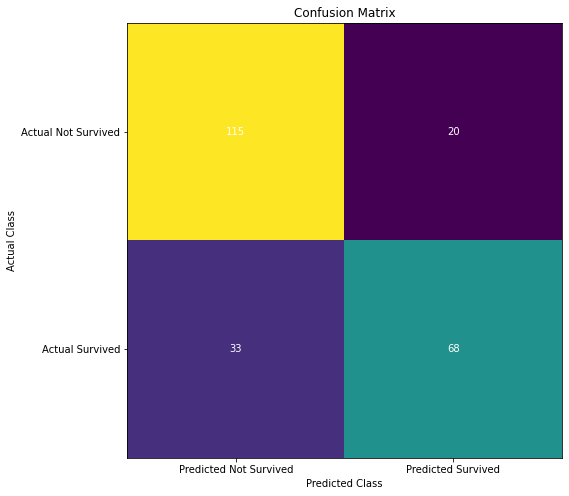

[[109  26]
 [ 40  61]]
Model[5] Testing Accuracy="0.7203389830508474"


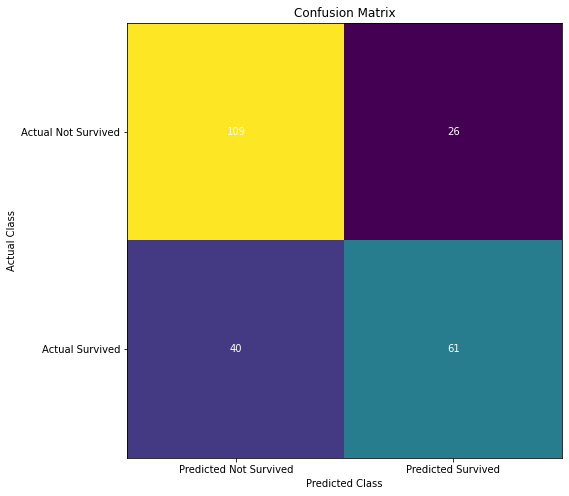

[[122  13]
 [ 39  62]]
Model[6] Testing Accuracy="0.7796610169491526"


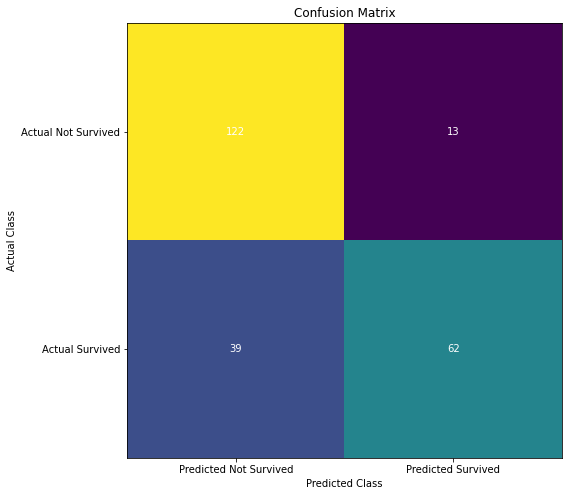

In [43]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    test_score = (TP + TN) / (TP + TN + FN + FP)
                                      
    print(cm)
    print('Model[{}] Testing Accuracy="{}"'.format(i, test_score))
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_ylabel("Actual Class")
    ax.set_xlabel("Predicted Class")
    ax.yaxis.set(ticks=range(2),ticklabels=("Actual Not Survived", "Actual Survived"))
    ax.xaxis.set(ticks=range(2),ticklabels=("Predicted Not Survived", "Predicted Survived"))
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
    plt.title("Confusion Matrix")
    plt.show()
    print("===========================================")


In [44]:
knn_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_1.fit(X_train, y_train)
test_prediction_knn_1 = knn_1.predict(X_test)
print("Hasil Akurasi KNN model lama:",round(accuracy_score(y_test,test_prediction_knn_1),3))

Hasil Akurasi KNN model lama: 0.797


In [45]:
svc_rbf_1 = SVC(kernel='rbf', random_state=0)
svc_rbf_1.fit(X_train, y_train)
test_prediction_svc_1 = knn_1.predict(X_test)
print("Hasil Akurasi SVC model lama:",round(accuracy_score(y_test,test_prediction_svc_1),3))

Hasil Akurasi SVC model lama: 0.797


Berdasarkan hasil akurasi training dan test nilai model yang paling seimbang dan masih dianggap cukup baik adalah model **KNeighbors Classifier train (86%) test(80%) dan SVC(rbf) train(84%) test(80%)** dikarenakan nilai akurasi training dan test tidak terlalu berbeda, Hasil akurasi juga sama maka kita bisa memilih dari salah satu model tersebut. Sekarang saya ingin memilih model KNN.

## Change hyperparameters
Kita perlu mencoba kembali model kita agar memiliki hasil akurasi lebih tinggi dibanding sebelumnya, maka itu n_neighbors kita maksimalkan menjadi 20. Dan metric nya menggunakan euclidean untuk biasanya menghasilkan nilai akurasi yang lebih maksimal dikarenakan euclidean bisa menghasilkan akurasi yang tepat, kemudian kita tambahkan leaf_size sebesar 20.

In [46]:
errors=[]
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred !=y_test)
    accuracies.append(accuracy)
    errors.append(error)

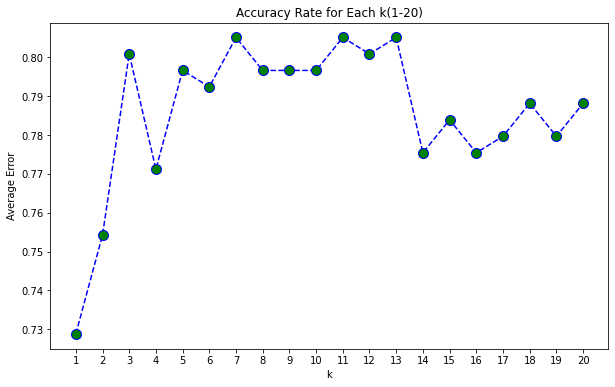

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracies, color="blue", linestyle="dashed", marker="o", markerfacecolor="green", markersize =10)
plt.title("Accuracy Rate for Each k(1-20)")
plt.xlabel("k")
plt.xticks(range(1,21))
plt.ylabel("Average Error")
plt.show()

***K = 13 yang memiliki akurasi yang paling tinggi***

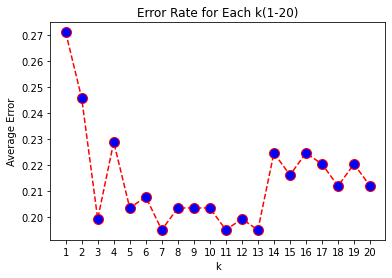

In [48]:
#plt.figure(figsize=(10,6))
plt.plot(range(1,21), errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize =10)
plt.title("Error Rate for Each k(1-20)")
plt.xlabel("k")
plt.xticks(range(1,21))
plt.ylabel("Average Error")
plt.show()

***k=11 dan k=13 memiliki error yang paling rendah***

In [49]:
knn_2 = KNeighborsClassifier(n_neighbors = 13,leaf_size =20,p=1,metric = 'euclidean')
knn_2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, metric='euclidean', n_neighbors=13, p=1)

In [50]:
train_prediction_knn_2 = knn_2.predict(X_train)
test_prediction_knn_2 = knn_2.predict(X_test)
    
print("--Training Performance--")
print(classification_report(y_train, train_prediction_knn_2))
print("--Testing Performance--")
print(classification_report(y_test, test_prediction_knn_2))

--Training Performance--
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       289
           1       0.82      0.76      0.79       189

    accuracy                           0.84       478
   macro avg       0.84      0.82      0.83       478
weighted avg       0.84      0.84      0.84       478

--Testing Performance--
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       135
           1       0.83      0.68      0.75       101

    accuracy                           0.81       236
   macro avg       0.81      0.79      0.80       236
weighted avg       0.81      0.81      0.80       236



In [51]:
knn_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_1.fit(X_train, y_train)
test_prediction_knn_1 = knn_1.predict(X_test)
print("Hasil Akurasi KNN model lama:",round(accuracy_score(y_test,test_prediction_knn_1),3))

Hasil Akurasi KNN model lama: 0.797


In [52]:
print("Hasil Akurasi KNN model baru:",round(accuracy_score(y_test,test_prediction_knn_2),3))

Hasil Akurasi KNN model baru: 0.805


**Setelah kita menggunakan k=13 hasilnya ternyata lebih baik dibandingkan k=5. Maka, kita akan gunakan nilai k=13 sebagai model prediksi**

## Grid Search CV
***Selain itu, kita akan mencoba mencari angka hyperparameter yang tepat untuk model ini dengan menggunakan GridSearchCV***

In [53]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2]

In [54]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [55]:
#cv itu cross validation
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=3, scoring ='accuracy')

In [56]:
#Fit the model
best_model = clf.fit(X_test,y_test)

In [57]:
#Nilai hyperpaameters terbaik
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 17


***Mari kita coba hasilnya hyperparameter yang telah disediakan apakah lebih baik dibanding sebelumnya atau sama saja?***

In [58]:
knn_3 = KNeighborsClassifier(n_neighbors = 17,metric="euclidean",leaf_size=1, p=2)
knn_3.fit(X_train, y_train)
test_prediction_knn_3 = knn_3.predict(X_test)
print("Hasil Akurasi KNN model lama:",round(accuracy_score(y_test,test_prediction_knn_3),3))

Hasil Akurasi KNN model lama: 0.78


***nyatanya nilai akurasi lebih rendah hanya 0.1 saja, maka kita gunakan model yang kedua untuk sebagai model prediksi***

## Model  Prediction

In [59]:
# print prediction of KNeighbors Classifier model
pred = model[1].predict(X_test)
print(pred)

print()

# print the actual values
print(y_test)

[0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 0 1]

480    0
325    1
141    1
541    0
242    0
      ..
637    0
830    1
125    1
252    0
701    1
Name: Survived, Length: 236, dtype: int64


In [60]:
# print prediction of KNeighbors Classifier Second model 
pred = knn_2.predict(X_test)
print(pred)

[0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 1]


In [61]:
# print prediction of KNeighbors Classifier third model 
pred = knn_3.predict(X_test)
print(pred)

[0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 0]


# Evaluation Model

 Mari kita coba untuk model yang telah dibuat apakah berhasil dapat memprediksi atau tidak. Kita akan gunakan atribut di bawah ini sebagai evaluasi model:
- **pclass =3, sex=1, age=21, sibsp=0, parch=0, fare=0, embarked=1**, kita asumsikan dengan kriteria tersebut tidak akan selamat dikarenakan seorang pria berada di kelas 3 dengan memiliki umur yang masih muda.
- **pclass =1, sex=0, age=20, sibsp=2, parch=1, fare=71.2833, embarked=0**, kita asumsikan dengan kriteria tersebut akan selamat dikarenakan seorang perempuan berada di kelas 1 dengan umur yang masih muda.


## **First Model : K= 5**

In [62]:
# my survival
my_survival = [[1,0,20,2,1,71.2833,0]]
#scalling y survival
#sc = StandardScaler()
#my_survival_scaled = sc.fit_transform(my_survival)
#print prediction of my survival using Random Forest Classifier
pred  = model[1].predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[1]
Nice! You survived


In [63]:
# my survival
my_survival = [[3,1,21,0,0,0,1]]

#print prediction of my survival using Random Forest Classifier
pred  = model[1].predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[0]
Oh no! You didn't make it


## Second Model : KNN_2,  K=13

In [64]:
# my survival
my_survival = [[1,0,20,2,1,71.2833,0]]
#scalling y survival
#sc = StandardScaler()
#my_survival_scaled = sc.fit_transform(my_survival)
#print prediction of my survival using Random Forest Classifier
pred  = knn_2.predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[1]
Nice! You survived


In [65]:
# my survival
my_survival = [[3,1,21,0,0,0,1]]

#print prediction of my survival using Random Forest Classifier
pred  = knn_2.predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[0]
Oh no! You didn't make it


## Third Model : KNN_3, K=17

In [66]:
# my survival
my_survival = [[1,0,20,2,1,71.2833,0]]
#scalling y survival
#sc = StandardScaler()
#my_survival_scaled = sc.fit_transform(my_survival)
#print prediction of my survival using Random Forest Classifier
pred  = knn_3.predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[1]
Nice! You survived


In [67]:
# my survival
my_survival = [[3,1,21,0,0,0,1]]

#print prediction of my survival using Random Forest Classifier
pred  = knn_3.predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[0]
Oh no! You didn't make it


**Dari hasil evaluasi model diketahui bahwa ketiga model sudah dapat berjalan dan dapat memprediksi dengan baik. Namun, hanya satu model yang dapat kita pilih yaitu model kedua dengan k=13 yang akan menjadi model untuk memprediksi keselamatan penumpang.**

### Kesimpulan

Kesimpulan model K-Nearest Neighbors (k-13) yang telah dibangun cukup bagus yaitu dengan nilai akurasi 0.80 dengan nilai akurasi seperti itu dapat memprediksi nilai secara akurat pada dataset Titanic. Model ini dapat memprediksi secara akurat siapa yang akan bertahan dan siapa yang tidak akan bertahan. Melalui visualisasi kami menemukan bahwa perempuan memilki lebih banyak peluang untuk bertahan hidup daripada laki-laki, kelas 1 memiliki lebih banyak kesempatan untuk hidup. Namun, kelompok usia muda 20-35 tahun laki-laki dari kelas 3 akan sulit untuk selamat. 